# Visual Odometry

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from lib import hest, PI, homogeneous

In [37]:
# camera matrix
K = np.loadtxt('data/week11-12/K.txt')

# images
im = []
for i in range(20):
    image = cv2.imread("data/week11-12/sequence/0000{:02d}.png".format(i+1))[:, :, ::-1]
    im.append(image)

### 1. SIFT matches

In [91]:
im0, im1, im2 = im[0], im[1], im[2]
n_im = 3

In [253]:
sift = cv2.SIFT_create(nfeatures=2000)
kps, des = [], []
for i in range(n_im):
    kp_i, d = sift.detectAndCompute(im[i], None)
    kps.append(np.array([k.pt for k in kp_i]))
    des.append(d)

bf = cv2.BFMatcher(crossCheck=True)
matches = []
for i in range(n_im - 1):
    matches_i = bf.match(des[i], des[i + 1])
    matches_i = np.array([(m.queryIdx, m.trainIdx) for m in matches_i])
    matches.append(matches_i)

### 2. Essential matrix with RANSAC and relative pose

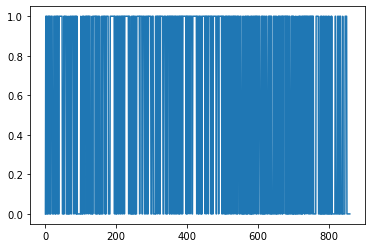

In [255]:
plt.plot(mask)

In [254]:
Es = []
Rs = []
ts = []
for i in range(n_im - 1):
    points_i   = kps[i    ][matches[i][:, 0]]
    points_ip1 = kps[i + 1][matches[i][:, 1]]

    E_i, mask = cv2.findEssentialMat(
        points_i,
        points_ip1,
        cameraMatrix=K,
        method=cv2.RANSAC
    )
    Es.append(E_i)
    _, R, t, _ = cv2.recoverPose(Es[i], points_i, points_ip1, K)
    inlier = np.argwhere(mask.flatten())
    Rs.append(R)
    ts.append(t)
    matches[i] = matches[i][inlier.flatten()].reshape((-1, 2))
    print(matches[i])

[[   0  464]
 [   1  299]
 [   3  158]
 ...
 [1981 1997]
 [1982 1648]
 [1997 1949]]
[[   5 1718]
 [  12  412]
 [  14 1390]
 [  20 1371]
 [  25  855]
 [  28  406]
 [  29   55]
 [  31  528]
 [  36  472]
 [  37  471]
 [  38  444]
 [  39 1681]
 [  48 1437]
 [  51 1438]
 [  53 1034]
 [  59 1444]
 [  63 1448]
 [  65  771]
 [  66  770]
 [  70 1451]
 [  71 1452]
 [  75  997]
 [  77  419]
 [  79 1099]
 [  83 1421]
 [  84 1400]
 [  85 1453]
 [  86 1104]
 [  87  124]
 [  88 1646]
 [  98  564]
 [ 102 1041]
 [ 105 1440]
 [ 106 1441]
 [ 108 1259]
 [ 110  861]
 [ 114 1031]
 [ 119  760]
 [ 126 1361]
 [ 128  373]
 [ 129  374]
 [ 132 1250]
 [ 133 1141]
 [ 134 1249]
 [ 138  746]
 [ 141 1936]
 [ 145 1461]
 [ 148 1462]
 [ 149 1224]
 [ 150 1237]
 [ 158 1312]
 [ 163  726]
 [ 177 1345]
 [ 193 1937]
 [ 195 1309]
 [ 196  492]
 [ 197  395]
 [ 204  393]
 [ 205  394]
 [ 208  489]
 [ 209  490]
 [ 212  491]
 [ 213 1516]
 [ 218 1335]
 [ 224  181]
 [ 229  933]
 [ 230  913]
 [ 231  703]
 [ 233  518]
 [ 243 1555]
 [ 248

### 3. Subset of features in 3 consecutive images

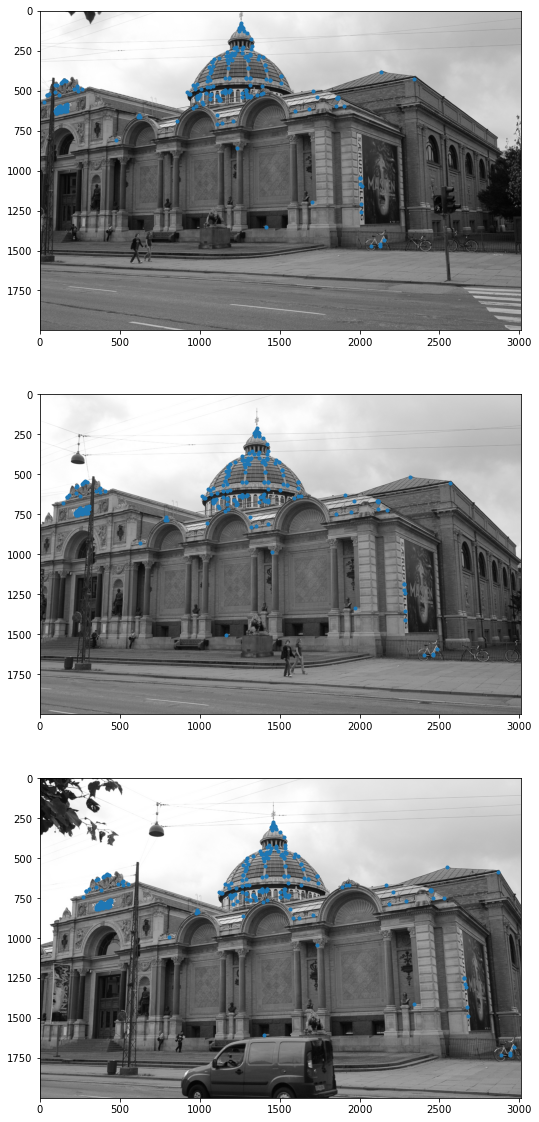

In [256]:
_, idx01, idx12 = np.intersect1d(matches[0][:,1], matches[1][:,0], return_indices=True)

points = []
points.append(kps[0][matches[0][idx01, 0]])
points.append(kps[1][matches[1][idx12, 0]])
points.append(kps[2][matches[1][idx12, 1]])

fig, ax = plt.subplots(3, figsize=(30, 20))
for i in range(3):
    ax[i].imshow(im[i])
    ax[i].plot(points[i][:, 0], points[i][:, 1], '.')

### 4. Triangulation and pose estimation